<a href="https://colab.research.google.com/github/berlinguette/ada/blob/master/2022_MTHF_Kinetic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supplementary code for "Electrochemical production of 2-methyltetrahydrofuran from furfural" by Stankovic et al.

This python notebook describes the techniques used to fit the zero and first order kinetic rate models to the experimental data describe in figures 6b and 6c.



## Code for figure 6b

0.00011594053874999988
r2 = 0.918


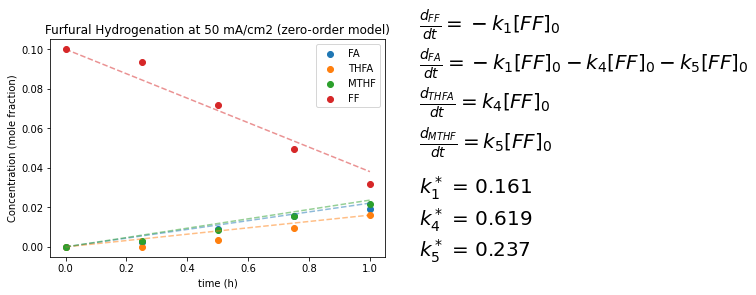

In [10]:
# optimizing the k-values for a system of equations with 4 molecules 50 mA/cm2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import least_squares

tspan = np.array([0,0.25,0.5,0.75,1])
concFF = np.array([0.1,0.09337,0.07191,0.04978,0.03185])
concFA = np.array([0,0.00253,0.00887,0.01558,0.01936])
concTHFA = np.array([0,0,0.00347,0.00937,0.01600])
concMTHF = np.array([0,0.00293,0.00873,0.01589,0.02196])
y = np.array([concFF,concFA,concTHFA,concMTHF])

# plot the data
plt.scatter(tspan,concFA)
plt.scatter(tspan,concTHFA)
plt.scatter(tspan,concMTHF)
plt.scatter(tspan,concFF)
plt.legend(['FA','THFA','MTHF','FF'])

# define the model
def model(y,tspan,k4,k5,k6):  # zero order
  dyFF = -k6*concFF[0]
  dyFA = k6*concFF[0] - k5*concFF[0] - k4*concFF[0]
  dyTHFA = k4*concFF[0]
  dyMTHF = k5*concFF[0]
  return [dyFF,dyFA,dyTHFA,dyMTHF]

# def model(y,tspan,k4,k5,k6): # first order
#   concFF = y[0]
#   confFA = y[1]
#   dyFF = -k6*concFF
#   dyFA = k6*concFF - k5*confFA - k4*confFA
#   dyTHFA = k4*confFA
#   dyMTHF = k5*confFA
#   return [dyFF,dyFA,dyTHFA,dyMTHF]

# initial guesses for k
k4 = 0.028
k5 = 0.068
k6 = 0.01
k = np.array([k4,k5,k6])

# define the function to minimize via least squares
def residual_func(k_guess,x,y):
  # functions for computing the residuals of the model solution
  model_vals = odeint(model,[0.1,0,0,0],tspan,args=(tuple(k_guess))).T
  return model_vals.ravel() - y.ravel()

# perform least squares optimization
res_lsq = least_squares(residual_func, k, args=(tspan, y))
k_opt = res_lsq.x
print(res_lsq.cost)

# feed the LS parameter solution back into the model
y0 = [0.1,0,0,0]
tspan_model = np.linspace(tspan[0],1)
sol = odeint(model,y0,tspan_model,args=(tuple(k_opt))).T

# plot the solution
plt.plot(tspan_model,sol[1,:],linestyle='dashed',alpha=0.5)
plt.plot(tspan_model,sol[2,:],linestyle='dashed',alpha=0.5)
plt.plot(tspan_model,sol[3,:],linestyle='dashed',alpha=0.5)
plt.plot(tspan_model,sol[0,:],linestyle='dashed',alpha=0.5)
plt.xlabel('time (h)')
plt.ylabel('Concentration (mole fraction)')
plt.title('Furfural Hydrogenation at 50 mA/cm2 (zero-order model)')
# plt.legend(['$y_A$','$y_B$'])
txt1 = '$\\frac{d_{FF}}{dt} = -k_1[FF]_0$ \n$\\frac{d_{FA}}{dt} = -k_1[FF]_0 - k_4[FF]_0 - k_5[FF]_0$ \n$\\frac{d_{THFA}}{dt} = k_4[FF]_0$ \n$\\frac{d_{MTHF}}{dt} = k_5[FF]_0$'
_ = plt.annotate(txt1, xy=(1.1, 0.5), fontsize=20, xycoords='axes fraction')
txt2 = '$k_1^*$ = %.3f \n$k_4^*$ = %.3f \n$k_5^*$ = %.3f' % (k_opt[0],k_opt[2],k_opt[1])
_ = plt.annotate(txt2, xy=(1.1, 0.0), fontsize=20, xycoords='axes fraction')

r2 = r2_score(y,odeint(model,y0,tspan,args=(tuple(k_opt))).T)
print('r2 = {:.3f}'.format(r2))

In [ ]:
# save the data for plotting in other software
import pandas as pd
df = pd.DataFrame(sol.T,columns=['model[FF]','model[FA]','model[THFA]','model[MTHF]'])
df['modeltime'] = tspan_model
df.to_csv('50_mA.csv')

## Code for figure 6c

cost: 3.7757525014144536e-05
r2 = 0.994


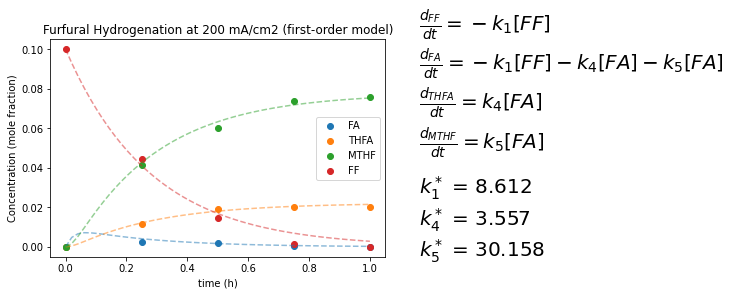

In [11]:
# optimizing the k-values for a system of equations with 4 molecules 200 mA/cm2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import least_squares
from sklearn.metrics import r2_score

tspan = np.array([0,0.25,0.5,0.75,1])
concFF = np.array([0.1,0.04443,0.01478,0.00158,0])
concFA = np.array([0,0.00244,0.00208,0.00055,0])
concTHFA = np.array([0,0.01178,0.01940,0.02037,0.02001])
concMTHF = np.array([0,0.04136,0.06030,0.07407,0.07570])
y = np.array([concFF,concFA,concTHFA,concMTHF])

# plot the data
plt.scatter(tspan,concFA)
plt.scatter(tspan,concTHFA)
plt.scatter(tspan,concMTHF)
plt.scatter(tspan,concFF)
plt.legend(['FA','THFA','MTHF','FF'])

# define the model
def model(y,tspan,k4,k5,k6):  # first order
  concFF = y[0]
  confFA = y[1]
  dyFF = -k6*concFF
  dyFA = k6*concFF - k5*confFA - k4*confFA
  dyTHFA = k4*confFA
  dyMTHF = k5*confFA
  
  return [dyFF,dyFA,dyTHFA,dyMTHF]

# initial guesses for k
k4 = 1
k5 = 1
k6 = 1
k = np.array([k4,k5,k6])

# define the function to minimize via least squares
def residual_func(k_guess,x,y):
  # functions for computing the residuals of the model solution
  model_vals = odeint(model,[0.1,0,0,0],tspan,args=(tuple(k_guess))).T
  return model_vals.ravel() - y.ravel()

# perform least squares optimization
res_lsq = least_squares(residual_func, k, args=(tspan, y))
k_opt = res_lsq.x
print('cost: {}'.format(res_lsq.cost))

# feed the LS parameter solution back into the model
y0 = [0.1,0,0,0]
tspan_model = np.linspace(tspan[0],1)
sol = odeint(model,y0,tspan_model,args=(tuple(k_opt))).T

# plot the solution
plt.plot(tspan_model,sol[1,:],linestyle='dashed',alpha=0.5)
plt.plot(tspan_model,sol[2,:],linestyle='dashed',alpha=0.5)
plt.plot(tspan_model,sol[3,:],linestyle='dashed',alpha=0.5)
plt.plot(tspan_model,sol[0,:],linestyle='dashed',alpha=0.5)
plt.xlabel('time (h)')
plt.ylabel('Concentration (mole fraction)')
plt.title('Furfural Hydrogenation at 200 mA/cm2 (first-order model)')
# plt.legend(['$y_A$','$y_B$'])
txt1 = '$\\frac{d_{FF}}{dt} = -k_1[FF]$ \n$\\frac{d_{FA}}{dt} = -k_1[FF] - k_4[FA] - k_5[FA]$ \n$\\frac{d_{THFA}}{dt} = k_4[FA]$ \n$\\frac{d_{MTHF}}{dt} = k_5[FA]$'
_ = plt.annotate(txt1, xy=(1.1, 0.5), fontsize=20, xycoords='axes fraction')
txt2 = '$k_1^*$ = %.3f  \n$k_4^*$ = %.3f \n$k_5^*$ = %.3f' % (k_opt[0],k_opt[2],k_opt[1])
_ = plt.annotate(txt2, xy=(1.1, 0.0), fontsize=20, xycoords='axes fraction')

r2 = r2_score(y,odeint(model,y0,tspan,args=(tuple(k_opt))).T)
print('r2 = {:.3f}'.format(r2))

In [7]:
# save the data for plotting in other software
import pandas as pd
df = pd.DataFrame(sol.T,columns=['model[FF]','model[FA]','model[THFA]','model[MTHF]'])
df['modeltime'] = tspan_model
df.to_csv('four_reaction_model.csv')